## Importando librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Cargando Datos

Este conjunto de datos tomado de <a href="https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?resource=download">kaggle</a> se deriva del conjunto de datos sobre vinos disponible en https://archive.ics.uci.edu/ml/datasets/wine, con la eliminacion de las etiquetas de los 3 tipos de vino para el aprendizaje no supervisado

Según la descripción proporcionada en la página web de la UCI, estos datos provienen de un análisis químico realizado en vinos cultivados en la misma región de Italia, pero provenientes de tres cultivares diferentes. El análisis determinó las cantidades de 13 constituyentes que se encuentran en cada uno de los tres tipos de vinos.

In [2]:
df = pd.read_csv('../Data/wine-clustering.csv')
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

## Analisis del Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Deteccion de valores nulos

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Deteccion de duplicados

In [5]:
df.duplicated().sum()

0

### Deteccion de outliers y valores nulos implicito

In [6]:
sns.set(style='whitegrid', context='notebook')

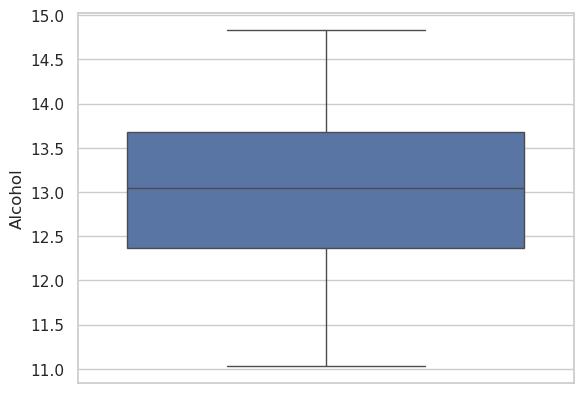

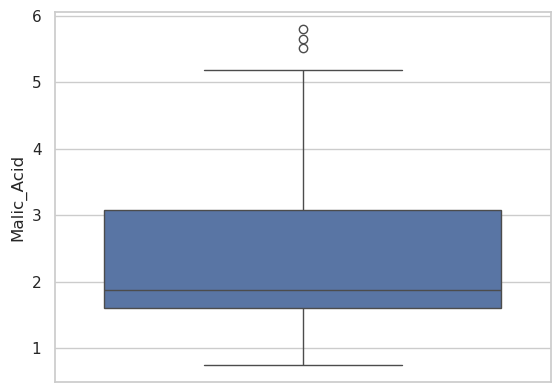

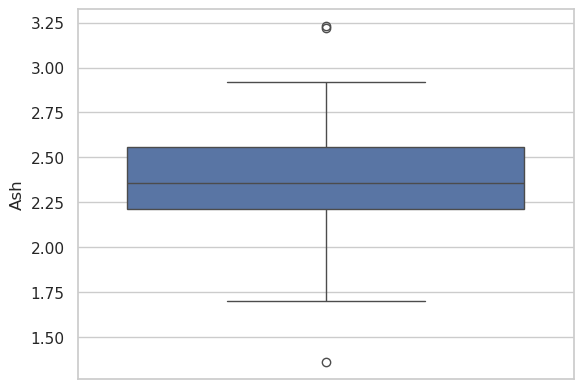

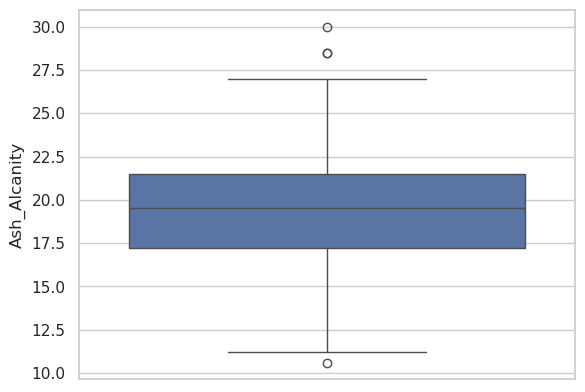

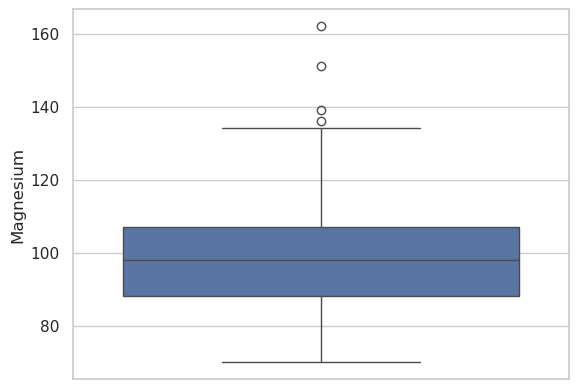

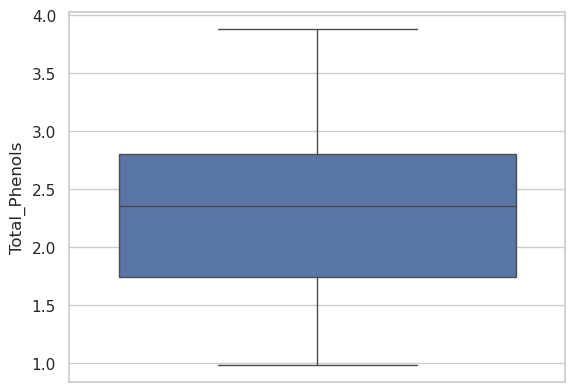

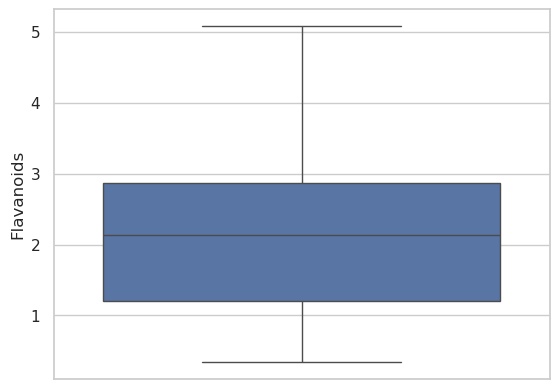

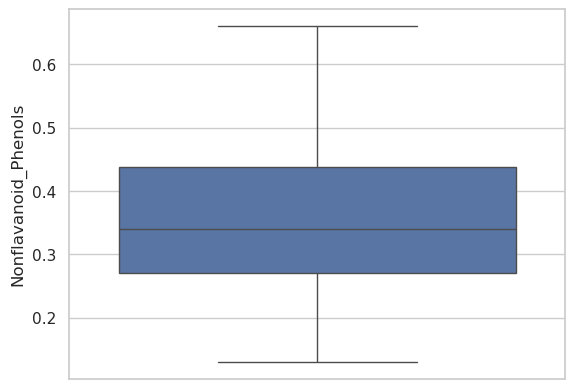

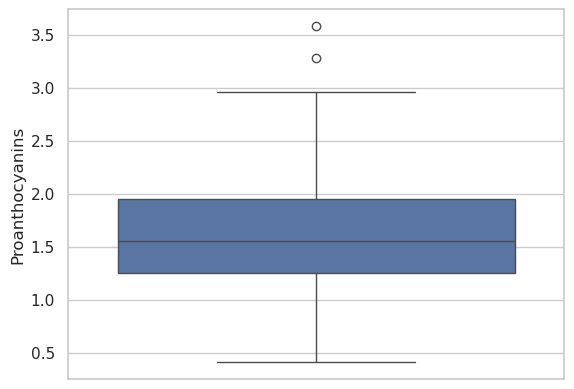

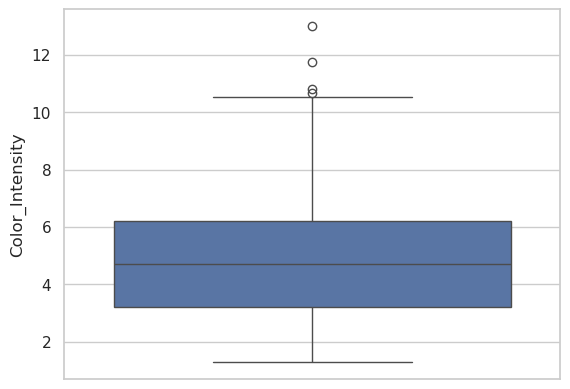

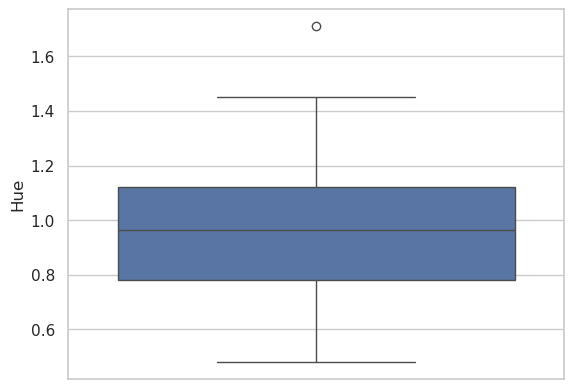

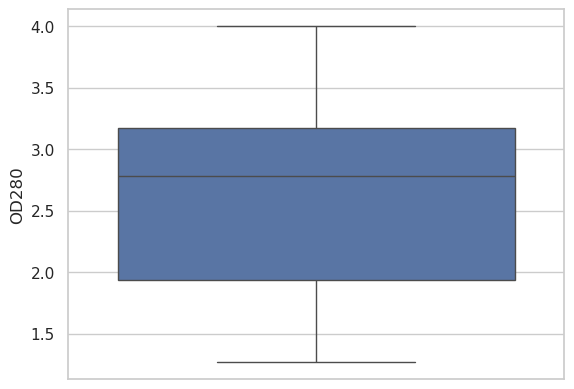

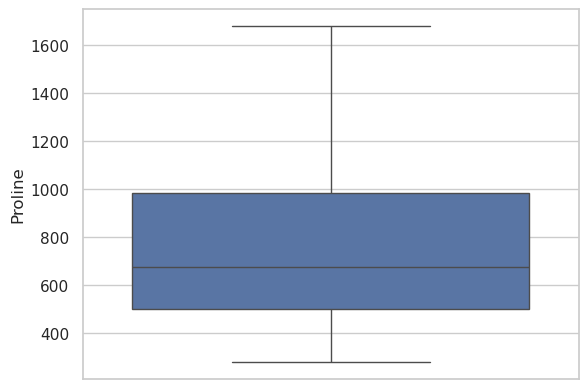

In [7]:
for i in df.columns:
    plt.figure()
    sns.boxplot(data=df,y=i)
    plt.show()

### Analisis de correlación

<Axes: >

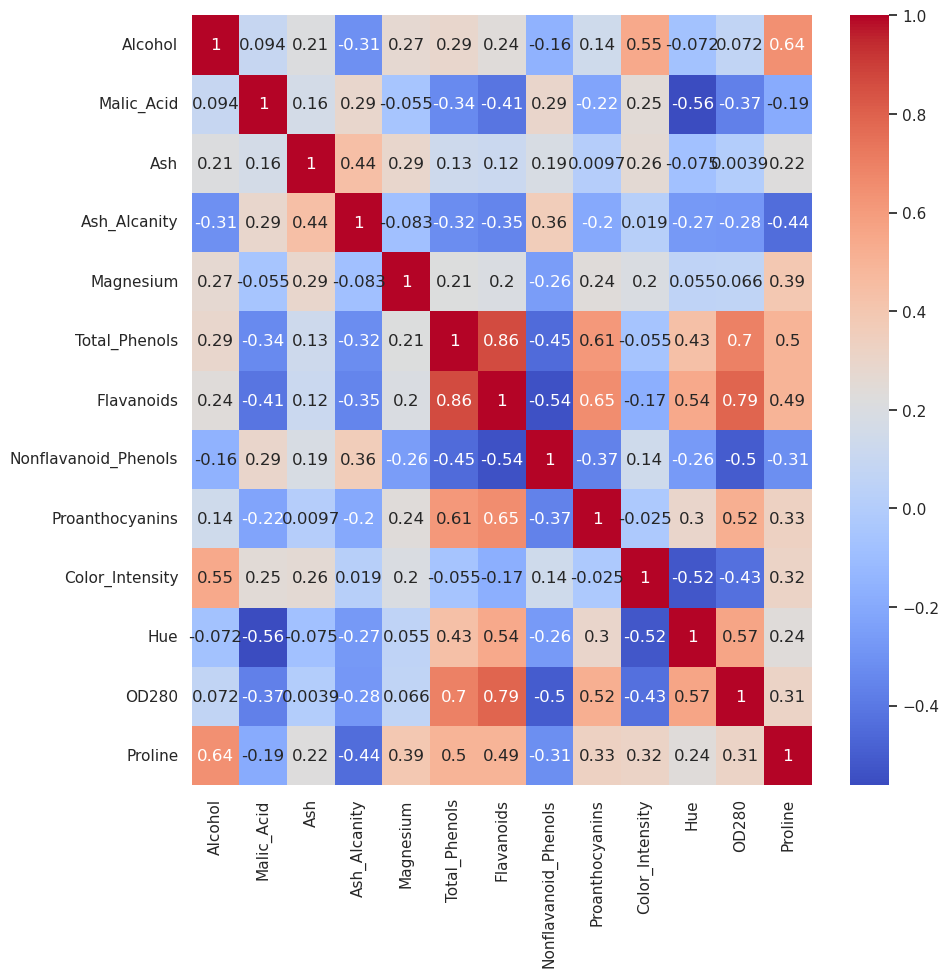

In [8]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

### Comportamiento de los datos

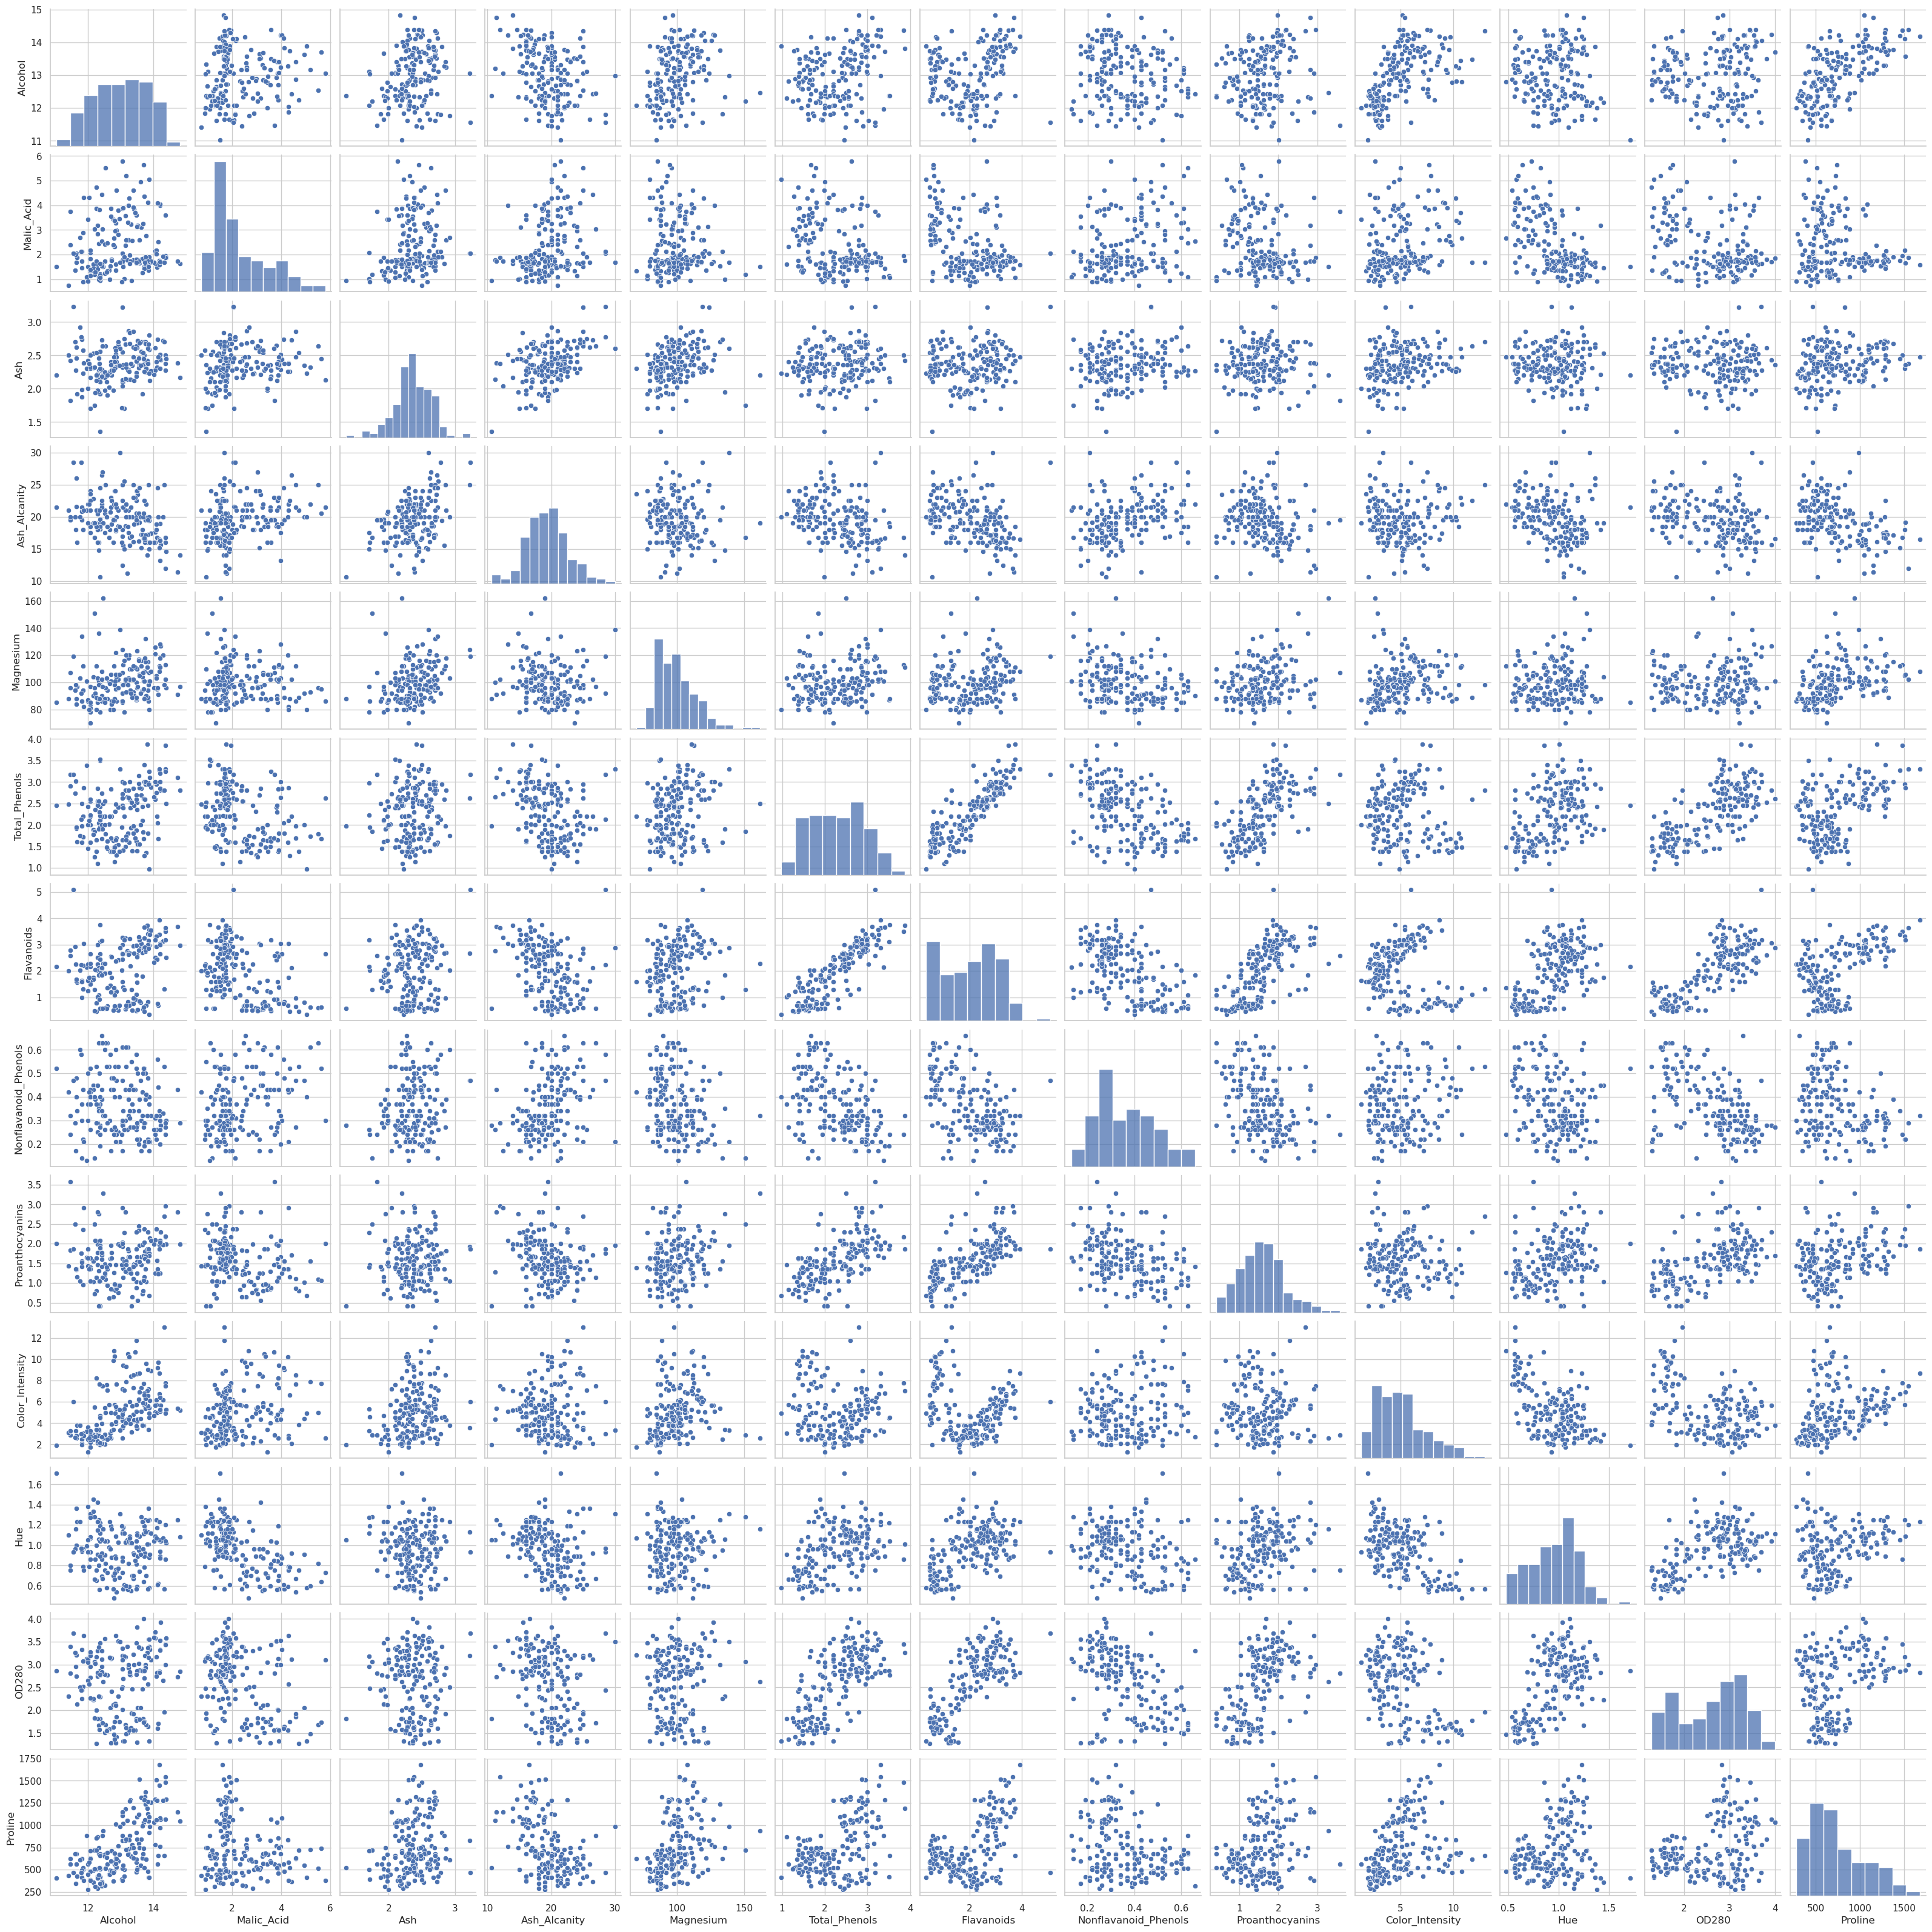

In [9]:
sns.pairplot(df)

## Procesamiento de datos 

### Escalando datos 

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


### Reducion de dimensionalidad con PCA

In [11]:
pca = PCA()
pca_data_scaled = pca.fit_transform(df_scaled)
pca_data_scaled

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### Visualizacion sobre los componentes que mejor explican la varianza de los datos

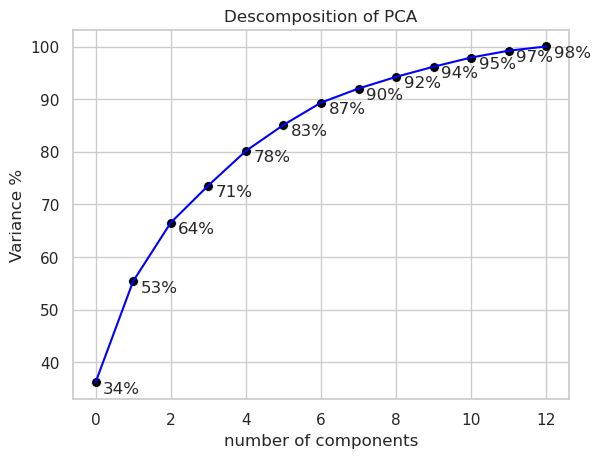

In [12]:
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var,decimals=4)*100) 
sns.scatterplot(x=range(len(cum_var)),y=cum_var,color="black",marker="o",s=50)
plt.plot(cum_var,color="blue")
plt.title("Descomposition of PCA")
plt.ylabel("Variance %")
plt.xlabel("number of components")
for i , index in zip(range(len(cum_var)),cum_var,):        
    i = i + 0.2
    index = index - 2 
    plt.text(x=i,y=index,s=f"{int(index)}%")
plt.show()

Opté por utilizar solo dos componentes, ya que en términos de los resultados de la métrica silhouette_score, proporciona un resultado aceptable.

In [13]:
pca_data_stamdard = pd.DataFrame(pca_data_scaled)
pca_data_stamdard.drop([12,11,10,9,8,7,6,5,4,3,2],axis=1,inplace=True)
pca_data_stamdard

0         1
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

## Algortimos K-Means

Utilizaré el algoritmo de K-Means, dado que conozco el número de clústeres.

### Sin PCA

In [14]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_scaled.values)
y = kmeans1.predict(df_scaled.values)
print(silhouette_score(df_scaled.values,y))

0.2848589191898987


### Con PCA

In [15]:
# implenta el algoritmo de k-means
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pca_data_stamdard.values)
y_pca = kmeans_pca.predict(pca_data_stamdard.values)
print(silhouette_score(pca_data_stamdard.values,y_pca))

0.5609305721582906


In [16]:
df["Cluster"] = y_pca
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Cluster  
0     3.92     1065        0  
1     3.40     1050        0  
2     3.17     1185        0  
3     3.45     1480        0  
4     2.93      735        0  
..     ...      ...      ...  
173   1.74      740        2  
174   1.56      750        2  
175   1.56      835        2  
176   1.62      840        2  
177   1.60      560        2  

[178 rows x 14 columns]

## Evaluando resultados

### Visualizando resultados

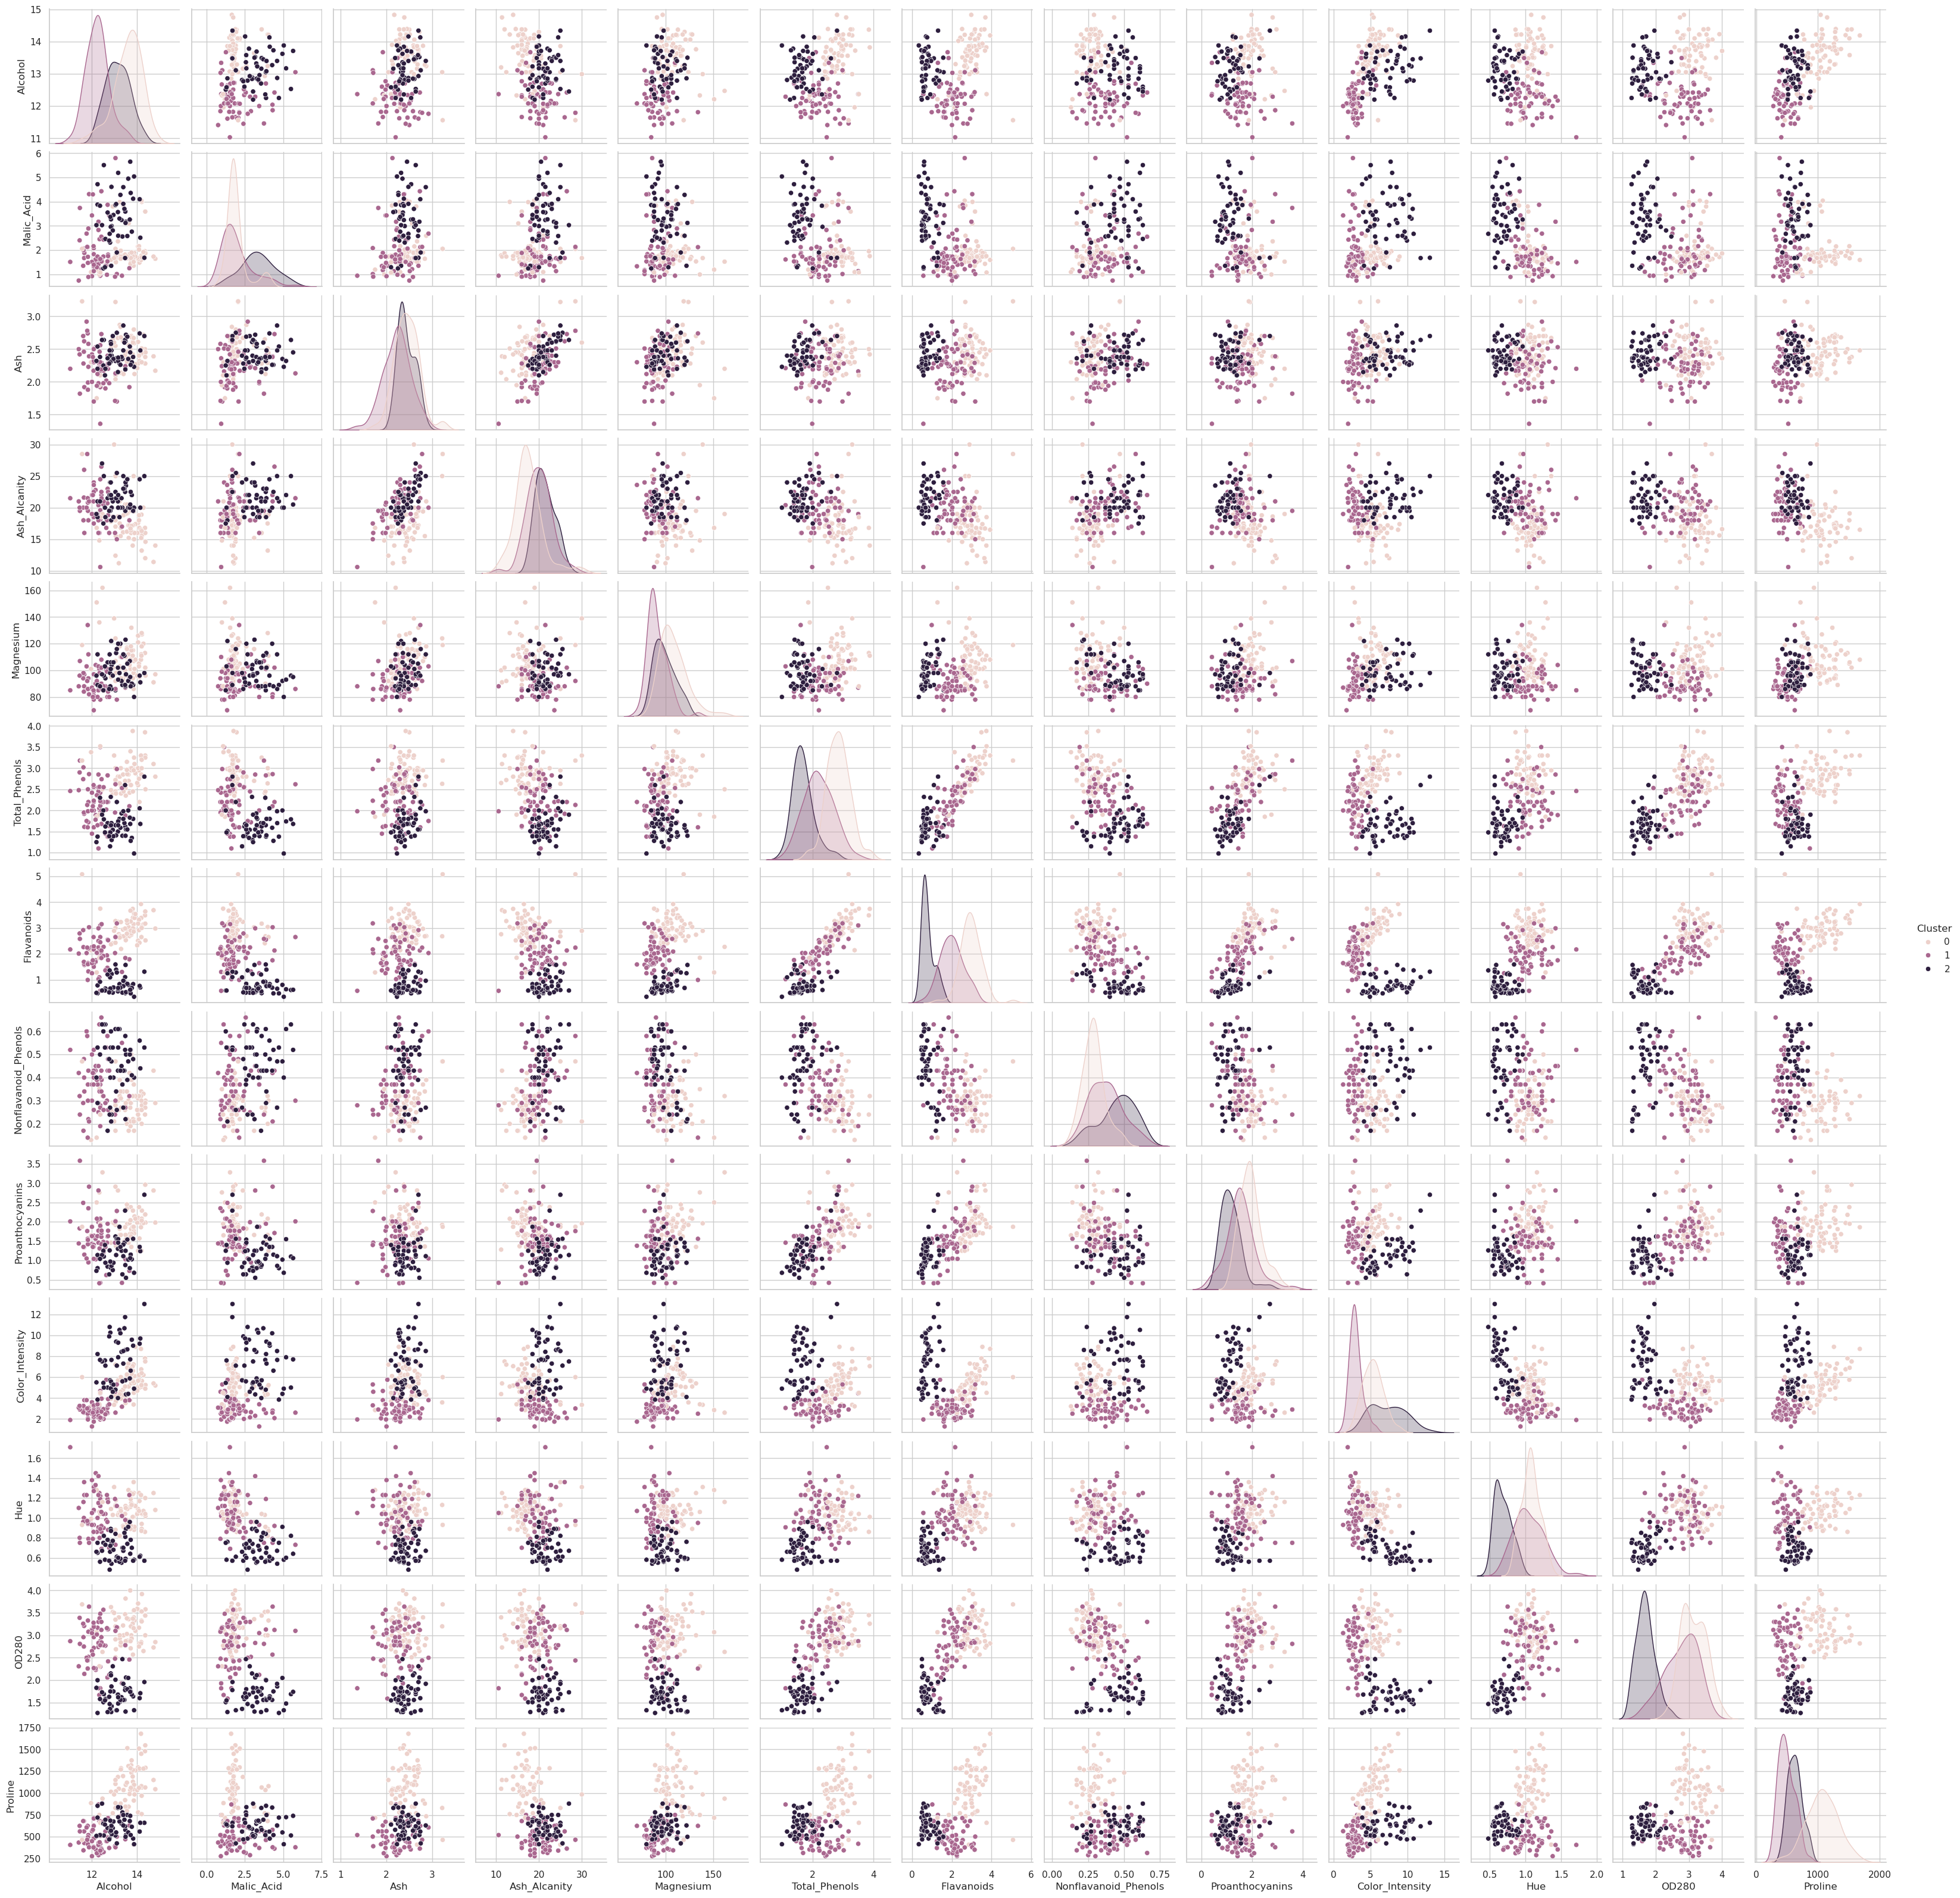

In [17]:
sns.pairplot(df,hue="Cluster")

### Comparando resultados con el dataset real

Este conjunto de datos es el real, con las clases verdaderas, y se comparará con las agrupaciones generadas por el modelo no supervisado.

El cojuntos de datos real lo pueden encontrar en https://archive.ics.uci.edu/ml/datasets/wine

In [23]:
data_real = pd.read_csv('../Data/wine_data.csv',header=None)
data_real.columns = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
    ]
data_real.Class = data_real.Class.apply(lambda x: x - 1)
data_real

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        0    14.23        1.71  2.43               15.6        127   
1        0    13.20        1.78  2.14               11.2        100   
2        0    13.16        2.36  2.67               18.6        101   
3        0    14.37        1.95  2.50               16.8        113   
4        0    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      2    13.71        5.65  2.45               20.5         95   
174      2    13.40        3.91  2.48               23.0        102   
175      2    13.27        4.28  2.26               20.0        120   
176      2    13.17        2.59  2.37               20.0        120   
177      2    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

Los true son las veces que acerto el modelo y false es el error

In [32]:
aciertos = data_real.Class.values == df.Cluster
aciertos = pd.Series(aciertos)
aciertos = aciertos.astype("category")
aciertos.value_counts()

Cluster
True     169
False      9
Name: count, dtype: int64

### Visualizacion de numero de aciertos

/tmp/ipykernel_886/2811949307.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(aciertos,palette="dark")


<Axes: xlabel='count', ylabel='Cluster'>

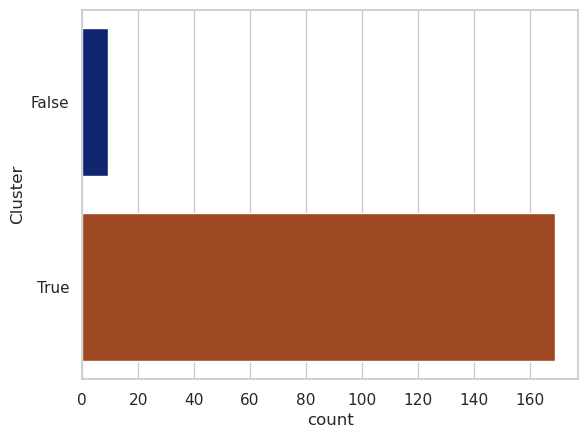

In [30]:
sns.countplot(aciertos,palette="dark")

El dataset ubtuvo un buen resultado 